# Análise dos dados obtidos

In [26]:
# Imports
#  /home/bradachi/Documentos/GitHub/NLP_teste/NLP_ENV/bin/python -m pip install 
import requests
import json
import pprint
import pandas as pd
import lxml
import time
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
import string
import matplotlib.pyplot as plt 
from textblob import TextBlob
# from selenium import webdriver
# from webdriver_manager.firefox import GeckoDriverManager 
# from selenium.webdriver.firefox.service import Service 
# from selenium.webdriver.common.action_chains import ActionChains
# from selenium.webdriver.common.keys import Keys
# from selenium.common.exceptions import NoSuchElementException


[nltk_data] Downloading package punkt to /home/bradachi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/bradachi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bradachi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
objects_list = [
"sensores",
"Comedouro Automático",
"guarda roupa inteligente",
"panela inteligente",
"geladeira inteligente",
"cocho inteligente",
"freezer inteligente",
"silo inteligente",
"ar-condicionado inteligente",
"aquecedor inteligente",
"ventilador inteligente",
"Termostato digital",
"fogão inteligente",
"fritadeira a ar inteligente",
"forno inteligente",
"janela inteligente",
"cortina inteligente",
"tomada inteligente",
"aspersor inteligente",
"controlador de irrigação inteligente",
"chuveiro inteligente",
"dispensador de água inteligente",
"filtro de água inteligente",
"estação de tratamento múltipla",
"smartwatch",
"óculos de realidade virtual",
"capacete inteligente",
"anel inteligente",
"colar inteligente",
"cinto inteligente",
"brinco inteligente",
"máscara inteligente",
"monitor de glicose inteligente",
"coleira inteligente",
"bota inteligente",
"fones de ouvido inteligentes",
"prótese inteligente",
"aparelho auditivo inteligente",
"microfone inteligente",
"sonar inteligente",
"cerca elétrica inteligente",
"sensor de perímetro",
"Computador",
"televisão inteligente",
"decodificador inteligente",
"reprodutor de mídia",
"painel de exibição inteligente",
"telemetria inteligente",
"projetor inteligente"
# "totem de autoatendimento",
"inteligente projetor",
"quadro branco inteligente",
# "totem de informações",
"patinete elétrico inteligente",
"robô de colheita",
"braço robótico",
"robô de capina",
"interruptor de luz inteligente",
"Disjuntor automático inteligente",
"secadora de roupas inteligente",
"máquina de lavar roupa inteligente",
"dispensador de comprimidos inteligente",
"lâmpada inteligente",
"RFID",
"Drone",
"impressora 3D inteligente",
"impressora inteligente",
"tapete inteligente",
"caixa de som inteligente",
"espelho inteligente",
"porta inteligente",
"fechadura inteligente",
"câmera inteligente",
"equipamento médico inteligente Kit",
"câmera",
"cafeteira inteligente",
"Google Nest",
"Asistentes pessoais",
"Alexa",
"Echo",
"HomeKit",
"Siri",
"Xiaomi smart home",
"Philips Hue",
"Intelbras smart home",
"Intelbras casa inteligente",
"Positivo Casa Inteligente",
"Multilaser",
"Fitbit",
"LG smart home",
"Tuya"
]
len(objects_list)

88

In [10]:
perguntas = pd.read_csv("perguntas.csv")
perguntas = perguntas.drop_duplicates().reset_index(drop=True)
perguntas

,pergunta,resposta,id,data
0,Minha cervejeira é VN28AF Termostato sollatek ...,"Boa tarde, seu termostato saiu de linha o subs...",MLB44743999,27/11/2025
1,Esse termostato tem os 4 pinos?,"Boa tarde, são 6 pinos porem os que tem função...",MLB44743999,26/11/2025
2,Teria para o modelo VF56DB 220V,"Boa tarde, seu modelo usa termostato sollatek,...",MLB44743999,26/06/2025
3,Ok ele e 220v,O termostato do anúncio é bivolt.,MLB44743999,15/05/2025
4,Bom dia ele serve para o modelo vb15 metal frio,"Bom dia, sim temos programações para expositor...",MLB44743999,16/05/2025
...,...,...,...,...
48026,Ta joia obrigada,obrigado,MLB58959195,24/06/2025
48027,"Ta joia, obrigada",ok,MLB58959195,24/06/2025
48028,"La não tá aberto para manda msg,só quero que m...","é estoque full, vai do jeito q pediu , é autom...",MLB58959195,24/06/2025
48029,Boa tarde.conprei essa coqueteleira na cor ros...,manda msg dentro da sua compra p identificar,MLB58959195,24/06/2025


In [11]:
avaliacoes = pd.read_csv("avaliacoes.csv")
avaliacoes = avaliacoes.drop_duplicates().reset_index(drop=True)
avaliacoes

,texto,nota,id,data
0,Excelente produto!!.,5,MLB46241561,09 out. 2025
1,Muito bom.,5,MLB48090512,15 out. 2025
2,Muito bom produto.,5,MLB48090512,16 out. 2025
3,Produto bom. Sem retorno.,5,MLB48090512,20 nov. 2025
4,Produto confiável e original. Eu mesmo arrumei...,5,MLB29176649,27 out. 2025
...,...,...,...,...
15260,Ótima qualidade.,5,MLB58289589,22 set. 2025
15261,Organizador semanal de remédios ajuda a otimiz...,5,MLB58289589,02 out. 2025
15262,O portacomprimidos é altamente elogiado por su...,5,MLB58289589,20 nov. 2025
15263,"Amei o produto, super incrível o material, os ...",5,MLB58289589,24 out. 2023


In [ ]:
smartObjects = pd.read_csv("contexto.csv")

wifiObjects = smartObjects[smartObjects["Context_Id"] == "WITH_WI_FI"]
bltObjects = smartObjects[smartObjects["Context_Id"] == "WITH_BLUETOOTH"]

smartObjects = pd.concat([wifiObjects, bltObjects])

smartObjects = smartObjects[smartObjects["value_name"] == "Sim"]

smartObjects = smartObjects["id"].drop_duplicates().reset_index(drop=True)
smartObjects = list(smartObjects)
smartObjects

In [19]:
smartObjectsReviews = ( avaliacoes[avaliacoes["id"].isin(smartObjects)]
                       .drop_duplicates()
                       .reset_index(drop=True)
                       .dropna() )
smartObjectsReviews

,texto,nota,id,data
0,E muito prático. Gostei.,5,MLB36333923,13 dez. 2024
1,Ajuda muito em viagens.,5,MLB36333923,16 jan. 2025
2,Muito top.,5,MLB36333923,29 mar. 2025
3,Me atende produto muito bom bom para o que pre...,5,MLB36333923,08 mai. 2025
4,Gostei muito 👏👏👏👏.,5,MLB36333923,24 jul. 2025
...,...,...,...,...
3527,"Igual do anúncio, ainda não instalei, mas está...",4,MLB47065738,27 nov. 2025
3528,Excelente!!! eu não estava disposto para passa...,5,MLB47065738,14 set. 2024
3530,"Já conheço a marca, tenho alguns produtos. Até...",5,MLB47065738,12 out. 2025
3531,O dimmer apresenta um acabamento atraente e é ...,5,MLB47065738,20 nov. 2025


In [14]:
smartObjectsQuestions = perguntas[perguntas["id"].isin(smartObjects)].drop_duplicates().reset_index(drop=True)
smartObjectsQuestions

,pergunta,resposta,id,data
0,Qual tamanho do cabo 12V,"Olá, boa tarde! Cerca de 2M!",MLB36333923,28/08/2025
1,Ela não congela só esfria,"Olá, boa tarde! Isso, ela é uma geladeira, dif...",MLB36333923,15/07/2025
2,"Boa tarde Estou precisando de duas placas , pr...","Olá, bom dia! Infelizmente não temos peças de ...",MLB36333923,14/07/2025
3,Tem o link só do cabo de alimentação dessa mes...,"Olá boa noite, No momento não temos estoque so...",MLB36333923,12/07/2025
4,Boa tarde preciso da 220 mas somente a 110 est...,"Oi, Luiz acurcio Abreu! Tudo bem? Neste anúnci...",MLB54448099,13/11/2025
...,...,...,...,...
12265,Consigo desligar os leds?,"Sim, consegue desligar leds inteligentes compa...",MLB46159986,25/09/2025
12266,Este interruptor pode ligar 2 lampadas sendo 1...,"Olá, você pode usar qualquer maneira que quise...",MLB40759619,21/11/2025
12267,funciona com Tuya e SmartLife?,sim,MLB40759619,18/11/2025
12268,Não consigo comprar do mesmo modelo os interru...,"Olá, só temos em estoque interruptores intelig...",MLB40759619,10/11/2025


In [ ]:
produtos = pd.read_csv("caracteristicas.csv")
produtos = produtos[produtos["id"].isin(smartObjects)].drop_duplicates().reset_index(drop=True) 
produtos

In [9]:
produtos["domain_id"].value_counts()

domain_id
MLB-SMARTWATCHES                       471
MLB-SMART_SPEAKERS                     457
MLB-LIGHT_BULBS                        386
MLB-TELEVISIONS                        359
MLB-ELECTRIC_LOCKS                     275
MLB-CELLPHONES                         256
MLB-NOTEBOOKS                          240
MLB-DIMMERS                            235
MLB-ELECTRICAL_OUTLETS                 209
MLB-WALL_LIGHT_SWITCHES                177
MLB-DRONES                             146
MLB-PROJECTORS                         140
MLB-HEADPHONES                         102
MLB-PRINTERS                            94
MLB-ELECTRIC_SCOOTERS                   83
MLB-IRRIGATION_TIMERS                   50
MLB-MICROPHONES                         47
MLB-FANS                                44
MLB-BLOOD_GLUCOSE_METERS                39
MLB-DIGITAL_TEMPERATURE_CONTROLLERS     36
MLB-AIR_CONDITIONERS                    31
MLB-ELECTRIC_HOME_HEATERS               14
MLB-SURVEILLANCE_CAMERAS                 9
M

In [50]:
# função de remoção de stopwords
def removerstopwords(texto):
    # deixando texto em minúsculo
    texto = texto.lower()

    # removendo pontuações do texto
    pontuacao = str.maketrans('', '', string.punctuation)
    texto = texto.translate(pontuacao)

    # removendo stopwords do texto
    palavras = word_tokenize(texto, language='english')
    stopwaords = set(stopwords.words('portuguese'))
    palavrasfiltradas = [palavra for palavra in palavras if palavra.lower() not in stopwaords]

    # removendo espaços vazios restantes dos tokens
    listasemvazios = list(filter(None, palavrasfiltradas))

    return listasemvazios

# chamando função
smartObjectsReviews['textofiltrado'] = smartObjectsReviews['texto'].apply(removerstopwords)
smartObjectsReviews

,texto,nota,id,data,textofiltrado,sentimento,tiposentimento
0,E muito prático. Gostei.,5,MLB36333923,13 dez. 2024,"[prático, gostei]",0.0,Neutro
1,Ajuda muito em viagens.,5,MLB36333923,16 jan. 2025,"[ajuda, viagens]",0.0,Neutro
2,Muito top.,5,MLB36333923,29 mar. 2025,[top],0.5,Positivo
3,Me atende produto muito bom bom para o que pre...,5,MLB36333923,08 mai. 2025,"[atende, produto, bom, bom, preciso, satisfeito]",0.0,Neutro
4,Gostei muito 👏👏👏👏.,5,MLB36333923,24 jul. 2025,"[gostei, 👏👏👏👏]",0.0,Neutro
...,...,...,...,...,...,...,...
3527,"Igual do anúncio, ainda não instalei, mas está...",4,MLB47065738,27 nov. 2025,"[igual, anúncio, ainda, instalei, tudo, ok]",0.5,Positivo
3528,Excelente!!! eu não estava disposto para passa...,5,MLB47065738,14 set. 2024,"[excelente, disposto, passar, fios, ligar, par...",0.0,Neutro
3530,"Já conheço a marca, tenho alguns produtos. Até...",5,MLB47065738,12 out. 2025,"[conheço, marca, alguns, produtos, então, quei...",0.0,Neutro
3531,O dimmer apresenta um acabamento atraente e é ...,5,MLB47065738,20 nov. 2025,"[dimmer, apresenta, acabamento, atraente, elog...",0.9,Positivo


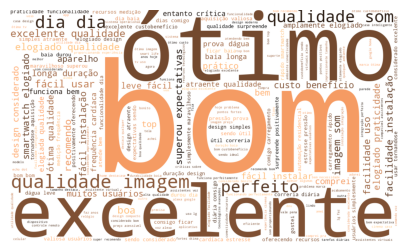

In [49]:
# import para gerar a nuvem de palavras


# função para gerar wordcloud
def nuvempalavrasgerar(texto, nome, colors):
    palavraschave = set(stopwords.words(['portuguese', 'english']))
    # inicializa uma word cloud
    wordcloud = WordCloud(stopwords = palavraschave,
                          background_color = 'white', # cor de fundo
                          width = 1000, # largura
                          height = 600, # altura
                          colormap  = colors) # cores das palavras

    wordcloud.generate(str(texto))
    plt.figure(figsize = (5, 5)) # tamanho do gráfico
    plt.imshow(wordcloud) # plotagem da nuvem de palavras
    plt.axis('off') # remove as bordas
    plt.show() # mostra a word cloud
    wordcloud.to_file(nome+'.png')

# preparar dados para o worcloud
smartObjectsReviews['textofiltrado'] = smartObjectsReviews['textofiltrado'].str.join(', ')
texto = " ".join(s for s in smartObjectsReviews['textofiltrado'])
texto = texto.replace('além', '')
texto = texto.replace('disso', '')
texto = texto.replace('notebook', '')
texto = texto.replace('frequentemente', '')
texto = texto.replace('mencionado', '')
texto = texto.replace('ter', '')
texto = texto.replace('produto', '')

# chamando a função
nuvempalavrasgerar(texto, "smartObjectsReviews", 'copper_r')

In [30]:
def analisesentimentos(texto):
  # Cria o objeto TextBlob
  blob = TextBlob(texto)

  # Pega o sentimento
  # se > 0.1 é positivo, se 0 é neutro e se < -0.1 é negativo
  sentimento = blob.sentiment
  return sentimento.polarity

# gerando dados
smartObjectsReviews['sentimento'] = smartObjectsReviews['texto'].apply(analisesentimentos)
smartObjectsReviews

,texto,nota,id,data,textofiltrado,sentimento
0,E muito prático. Gostei.,5,MLB36333923,13 dez. 2024,"prático, gostei",0.0
1,Ajuda muito em viagens.,5,MLB36333923,16 jan. 2025,"ajuda, viagens",0.0
2,Muito top.,5,MLB36333923,29 mar. 2025,top,0.5
3,Me atende produto muito bom bom para o que pre...,5,MLB36333923,08 mai. 2025,"atende, produto, bom, bom, preciso, satisfeito",0.0
4,Gostei muito 👏👏👏👏.,5,MLB36333923,24 jul. 2025,"gostei, 👏👏👏👏",0.0
...,...,...,...,...,...,...
3527,"Igual do anúncio, ainda não instalei, mas está...",4,MLB47065738,27 nov. 2025,"igual, anúncio, ainda, instalei, tudo, ok",0.5
3528,Excelente!!! eu não estava disposto para passa...,5,MLB47065738,14 set. 2024,"excelente, disposto, passar, fios, ligar, pare...",0.0
3530,"Já conheço a marca, tenho alguns produtos. Até...",5,MLB47065738,12 out. 2025,"conheço, marca, alguns, produtos, então, queix...",0.0
3531,O dimmer apresenta um acabamento atraente e é ...,5,MLB47065738,20 nov. 2025,"dimmer, apresenta, acabamento, atraente, elogi...",0.9


In [ ]:
# função de avaliação final
def tiposentimento(x):
  if x > 0.1:
    return 'Positivo'
  if x < -0.1:
    return 'Negativo'
  else:
    return 'Neutro'

# chamando a geração 
smartObjectsReviews['tiposentimento'] = smartObjectsReviews['sentimento'].apply(tiposentimento)

smartObjectsReviews

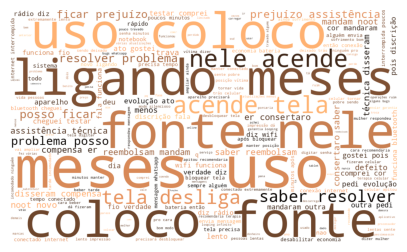

In [65]:
reviews_ruins = smartObjectsReviews[(smartObjectsReviews['tiposentimento'] != 'Positivo') & (smartObjectsReviews["nota"] <= '3')].reset_index(drop=True) 
reviews_ruins['textofiltrado'] = reviews_ruins['textofiltrado'].str.join(', ')
texto = " ".join(s for s in reviews_ruins['textofiltrado'])

texto = texto.replace('produto', '')
texto = texto.replace('pra', '')
texto = texto.replace('quer', '')
texto = texto.replace('nootbok', '')

nuvempalavrasgerar(texto, "reviews_ruins", 'copper_r')